In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#the person who asks the most dumb questions gets the smartest the fastest

#first example of classification, binary classification is an email spam or not spam

#multi class classification, is this photo sushi, steak, or pizza? more than one possiibility

#sort articles into categories, (multi label classification), multiple label options per sample, something can be more than one thing, example steak and brown

can use this to build an app for classifying foods


inputs ---> deep learning algorithm ---> outputs

before we pass our inputs to machine learning algorithms we need

In [4]:
#creating data to fit a view the data
from sklearn.datasets import make_circles

In [5]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [6]:
#check out features and labels, this is a binary class classification problem
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [7]:
#lets visualize the data to better understand it..

#ourdata is a little hard to understand right now lets visualize it

circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "label" : y})
circles #so we are getting coordinates

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


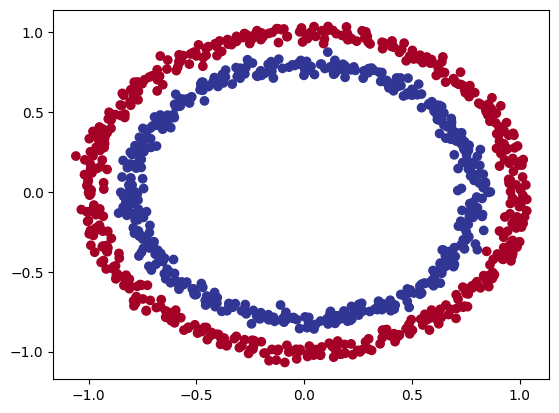

In [8]:
#lets visualize with a plot because its a little hard to understand

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu); #so we are trying to classify what circle the data points belong to, what type of model are we going to build

In [9]:
#how about we build a model to classify red or blue dots

#check the shapes of our featuers and labels
X.shape, y.shape, len(X), len(y)

((1000, 2), (1000,), 1000, 1000)

In [10]:
#view examples of features and labels
X[25], y[25]

(array([-0.93699411,  0.19944235]), 0)

In [11]:
#get data ready turn it into tensors, numpy arrays already work beaufifully with tensorflow

#output layer should have one neuron

#the steps in modeling with tensorflow - create model, compile model, fit model, evaluate model, tweak model, evaluate, tweak, evaluate

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"] #need to use classification metrics now, what percentage of predictions are right
)

model_1.fit(X, y, epochs = 5, verbose = 1) #accuracy improved over the 5 epochs, its actually less accurate than random guessing rip

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4879 - loss: 5.5666
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4806 - loss: 4.8552
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4794 - loss: 4.5053
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4998 - loss: 2.6859
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5123 - loss: 0.7325


In [12]:
#lets try and improve our model by training for longer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer= tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

model_2.fit(X, y, epochs = 200, verbose = 0)

In [13]:
model_2.evaluate(X, y) #cardnial sin just for testing purposes, annddd still awful, the epochs are not the issue

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [14]:
#what if we added another layer and trained for longer, our model is performing as if its guessing, lets add an extra layer
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"]
)

model_3.fit(X, y, epochs = 100, verbose = 0)

In [15]:
model_3.evaluate(X, y) #still learning nothing, still guessing

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4955 - loss: 0.6931


[0.6932256817817688, 0.5]

In [16]:
#improving our model

#lets try adjusting our hyper parameters, increase the number of hidden units and add an extra layer

tf.random.set_seed(42)

#create the model this time 3 layers
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #extra layer added 100 dense neurons
    tf.keras.layers.Dense(10), #added an additional layer
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy, #problem dependent
    optimizer = tf.keras.optimizers.Adam(), #try adam optimizer
    metrics = ["accuracy"] #baseline classification metric
)

model_4.fit(X, y, epochs = 100, verbose = 0)

In [17]:
model_4.evaluate(X, y) #still guessing after pulling out some tricks, just as good as guessing

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5135 - loss: 0.6916


[0.6937233805656433, 0.49000000953674316]

In [25]:
X_min, X_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))

xx.ravel().shape, xx.shape




((10000,), (100, 100))

In [28]:
#lets try to visualize the predictions to understand whats going wrong

#to visualize our models predictions lets create a function

#take in a model with features X and y
#it will create a numpy meshgrid of the different X values and make predictions across the mesh grid
#finally plot the predictions as well as a line between the different zones

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  plots decision boundary created by our model predicting on X
  """

  #creating a mesh grid
  X_min, X_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                       np.linspace(y_min, y_max, 100))

  #create X value were going to make predictions on these:
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2d arrays together

  y_pred = model.predict(x_in)

  #check for if were working on a multiclass problem
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    #we have to reshape our predictions then
    y_pred = y_pred.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


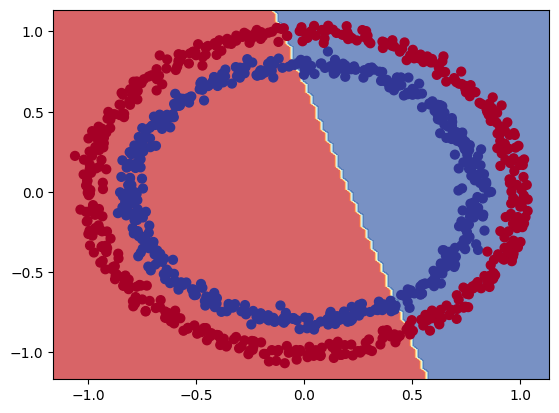

In [29]:
plot_decision_boundary(model_4, X, y)

In [33]:
#the model is trying to draw a straight line, lets see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #X + 100

#split our regression data into training and testsets

X_train_reg = X_regression[:150]
X_test_reg = X_regression[150:]
y_train_reg = y_regression[:150]
y_test_reg = y_regression[150:]

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

#model 5 is a recreation of model 3
model_5.fit(tf.expand_dims(X_train_reg, axis = -1), y_train_reg, epochs = 100, verbose = 0) #this model was comiled for binary classifcation when it should be mae or mse for a regression probelm.


In [32]:
X_train_reg.shape, y_train_reg.shape #needed to expand the dims of X_train for the model to work

(TensorShape([150]), TensorShape([150]))

In [34]:
model_5.evaluate(X_test_reg, y_test_reg)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 60.9967 - mae: 60.9967 


[63.64995193481445, 63.64995193481445]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


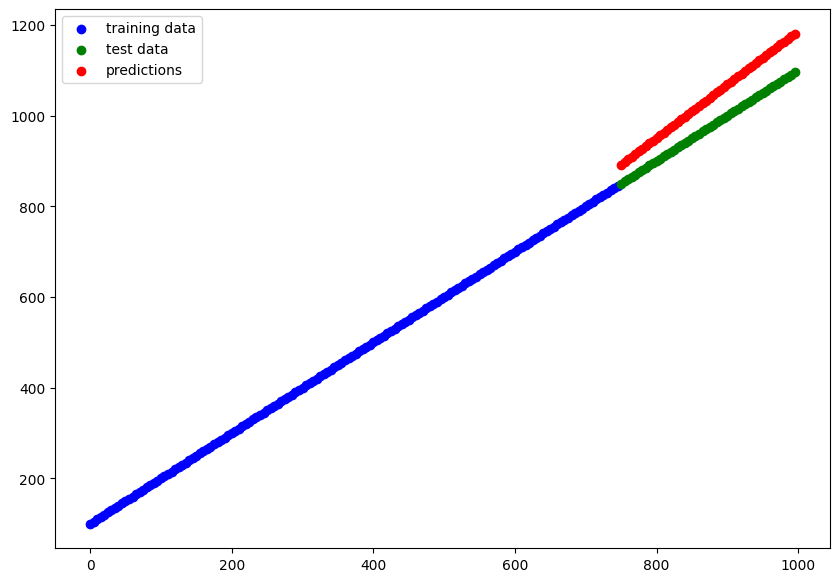

In [36]:
y_reg_preds = model_5.predict(X_test_reg)

plt.figure(figsize = (10, 7))
plt.scatter(X_train_reg, y_train_reg, c = "b", label = "training data")
plt.scatter(X_test_reg, y_test_reg, c = "g", label = "test data")
plt.scatter(X_test_reg, y_reg_preds, c = "r", label = "predictions")
plt.legend();

In [37]:
#better than complete guessing model must be learning something, this regression problem is a straight line, but in the classification problem this doesnt work because there is non-linearity

#the missing piece is non linearity and how to make our model work for this

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

#fit the model
history_6 = model_6.fit(X, y, epochs = 100, verbose = 0)

In [38]:
model_6.evaluate(X, y) #model is worse than guessing

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4656 - loss: 4.6756


[4.848635673522949, 0.46399998664855957]

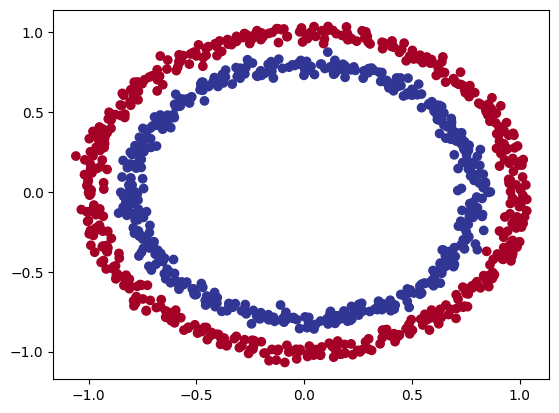

In [39]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


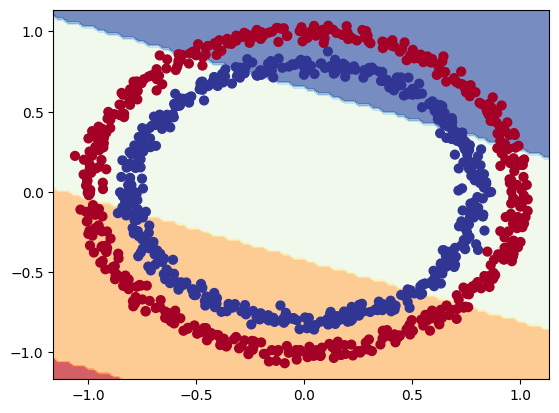

In [40]:
#check the decision boundary for our latest model

plot_decision_boundary(model_6, X, y) #model has no idea what to predict, still predicting straight lines because of the linear activation function

lets try to build our first neural network with a non linear activation function (anything that is not linear),

In [42]:
tf.random.set_seed(42)

#create a model with a non linear activation function

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, tf.keras.activations.relu)
])

model_7.compile(
    loss= tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

history_7 = model_7.fit(X, y, epochs = 100, verbose =0)

In [43]:
model_7.evaluate(X,y) #model is still not learning, we havent tried changing the activation function in conjunction with increasing the number of hidden layers and neurons

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4309 - loss: 4.7469


[4.393681526184082, 0.4729999899864197]

In [48]:
#lets try to adjust the hyper parameters to get the model to distinguish circles

#time to replicate the multilayer nn from tensorflow playground in code

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_8.compile(
    loss= tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

history_8 = model_8.fit(X, y, epochs = 100, verbose = 0)

In [49]:
model_8.evaluate(X, y) #still not working, needs to be trained on more epochs or make the learning rate faster, or make the model stronger

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4955 - loss: 8.1322


[8.059046745300293, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


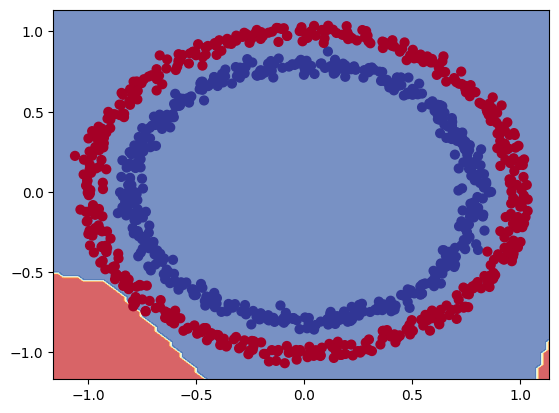

In [50]:
plot_decision_boundary(model_8, X, y) #starting to realize red might be toward the outside

In [51]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_9 = model_9.fit(X, y ,epochs = 250, verbose = 0)

In [52]:
model_9.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9796 - loss: 0.0939


[0.09059253334999084, 0.9819999933242798]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


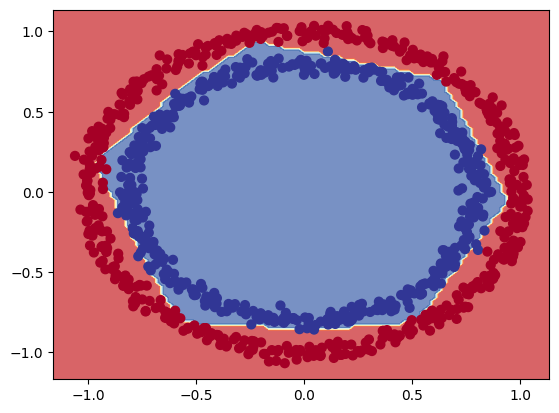

In [53]:
#lets visualize our incredible metrics
plot_decision_boundary(model_9, X, y) #model is very close to perfectly finding the difference between the red and blue dots

❓ whats wrong with the predictions we made?

we arent evaluating our model correctly we are learning on the same data we are predicting on

**note** the combination of linear and non _ linear lines is one of the key fundaments of neural networks

In [55]:
#lets see these example in action

#create a toy tensor (similar to the data we passed into our models)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

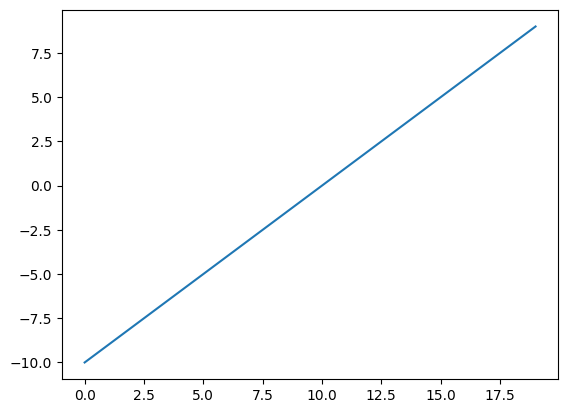

In [56]:
plt.plot(A); #its a linear line

In [57]:
#lets start by replicating sigmoid, sigmoid(x) = 1/ (1+exp(-x))

def sigmoid(x):
  return 1/(1 + tf.exp(-x))

In [58]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

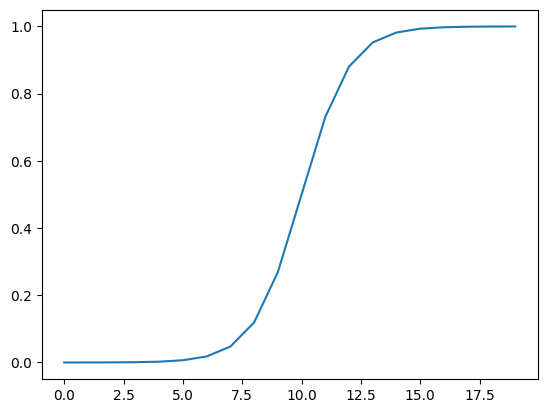

In [59]:
plt.plot(sigmoid(A)) #line was originally straight and now has been modified to be non straight

#the y is also scaled between 0 and 1

In [61]:
#lets try yo do the same thing for relu, lets recreate relu function

def relu(x):
  return tf.maximum(0, x)

#pass toy tensor to customrelu function
relu(A) #turned the negative numbers to 0

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

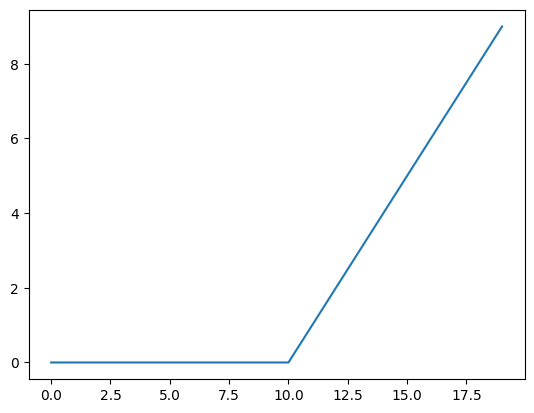

In [62]:
plt.plot(relu(A)) #its got an elbow in it compared to the linear pattern

In [63]:
#lets try the linear activation function, returns the input unmodified,

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [64]:
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397861e-05, 1.2339458e-04, 3.3535008e-04, 9.1105123e-04,
       2.4726230e-03, 6.6928524e-03, 1.7986210e-02, 4.7425866e-02,
       1.1920294e-01, 2.6894140e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

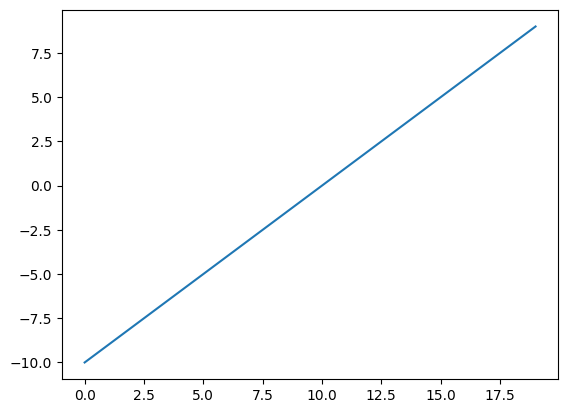

In [65]:
#does the linear activation function change anyhting
plt.plot(tf.keras.activations.linear(A))

In [66]:
A == tf.keras.activations.linear(A) #all of the elements are still the same, fundamental concpet

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [ ]:
#non linear functions able to deduce patterns in non linear data, neural networks use a combination of linear and non linear activation functions to find patterns in data

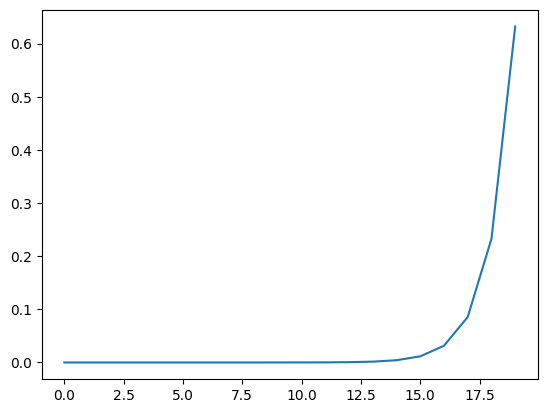

In [67]:
plt.plot(tf.keras.activations.softmax(A)) #soft max function plotted on a

In [ ]:
#evaluating and improving our classification model, we need to create training and test sets

In [68]:
len(X), len(y) #need to split up the data

(1000, 1000)

In [69]:
#three datasets , course materials, practice exam, final exam.. goal is for our model to generalize and perform well on data it hasnt seen before

#so far we've been training and testing on the same dataset in machine learning this is basically a sin, so lets split up the data into training and test sets

#split into train and test sets

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [74]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_10.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005), #every epoch we give our model the potenetial to update 10 times faster
    metrics = ["accuracy"]
)

history_10 = model_10.fit(X_train, y_train, epochs = 50, verbose = 0) #increased the learning rate by 10, by decreased the amount of times the model will go throguh the training data by 4 times

In [75]:
#evaluate the model on the test dataset
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9823 - loss: 0.0657  


[0.06687359511852264, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


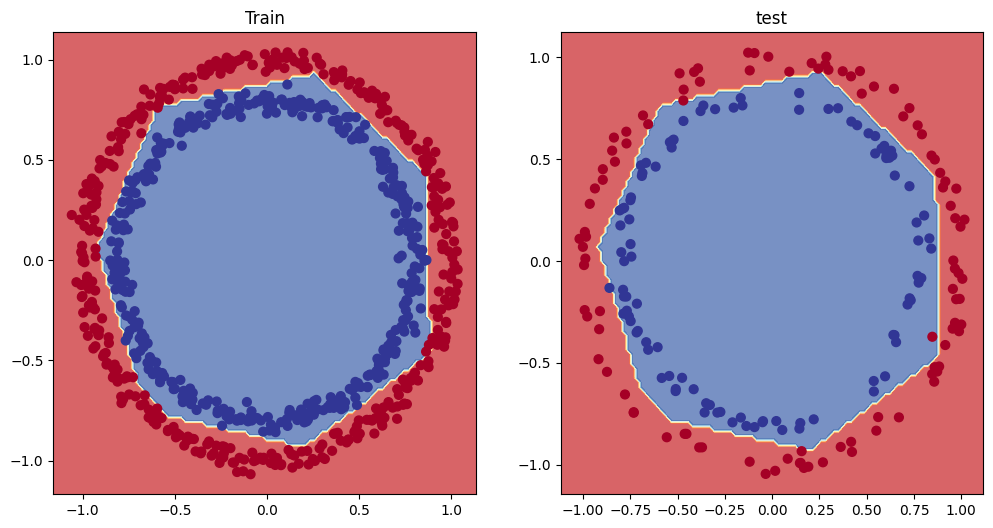

In [76]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_10, X_test, y_test)

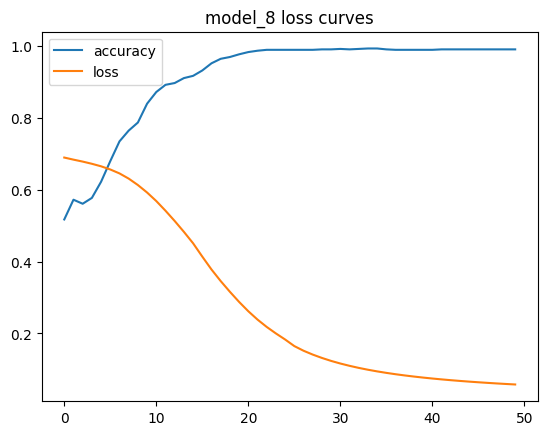

In [81]:
#so lets plot the history
#plot the loss curves

#the fit returns a history object , gives the loss and metrics at each epoch

#history_10.history #dictionary of accuracy and loss

pd.DataFrame(history_10.history).plot() #line plot by default

plt.title("model_8 loss curves");

**note** the loss function going down means the model is improving, the predictions its making are getting closer to the ground truth labels

In [82]:
#we can use loss curves to find the best learning rate, wouldlnt it be nice if we can find the ideal learning rate,

#need to visualize the loss decreasing , but we can decrease the learning rate during training, finding the best learning rate

#to find the learning rate where the losss decreases the most during training were going to use the following steps
#learning rate call back, you can think of a callback as an extra piece of functionality to add to the model while it is training

#were going to need another model,

#were going to need a modified loss curves plot.

#set random seed
tf.random.set_seed(42)

#create the model same as model 10
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

model_11.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))

history_11 = model_11.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4984 - loss: 0.7215 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7205 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4945 - loss: 0.7194 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4844 - loss: 0.7182 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4837 - loss: 0.7170 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4778 - loss: 0.7157 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4761 - loss: 0.7144 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4662 - loss: 0.7130 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4724 - loss: 0.7116 - learning_

<Axes: xlabel='epochs'>

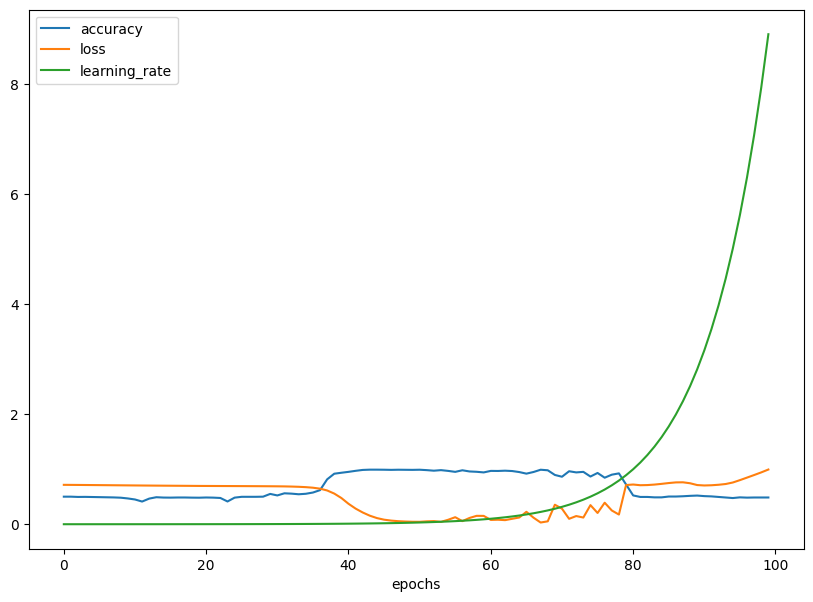

In [83]:
#check out the history
pd.DataFrame(history_11.history).plot(figsize = (10, 7), xlabel = "epochs")

In [ ]:
#the super high learning rate crushed accuracy, we want the learning rate where our loss is decreasing the fastest

In [84]:
#plot the learning rate vs the loss
lrs = 1e-4 * (10** (tf.range(100)/ 20))
lrs #this is the same thing we passes to the learning rate

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

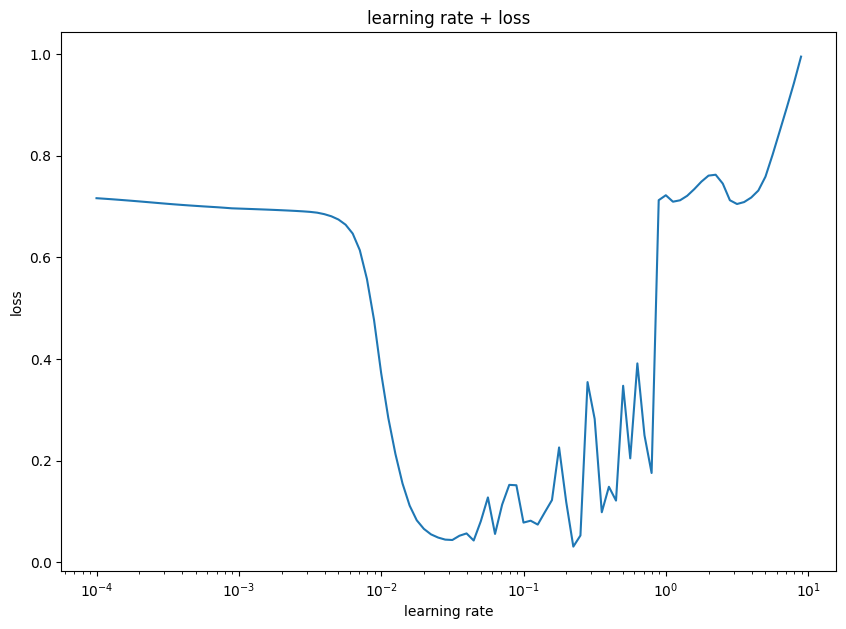

In [87]:
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_11.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate + loss");

In [88]:
#the rule of thumb is to take the learning rate where its decreasing but not yet flatlined, usually about 10 times smaller than the lowest point on the curve

#10**-2 is the ideal number learning rate

#heres what these learning rates look like, 10**-3 is default
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [91]:
#so it turns out our best model already uses the optimal learning rate
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_12.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
    metrics = ['accuracy']
)

#fit the model for 20 epochs (5 less than before)
history_12 = model_12.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5566 - loss: 0.6835
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5855 - loss: 0.6708 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6125 - loss: 0.6550
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6400 - loss: 0.6273
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7006 - loss: 0.5856 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7633 - loss: 0.5458 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7863 - loss: 0.5080 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8063 - loss: 0.4708 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8249 - loss: 0.4350
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8491 - loss: 0.4077 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8545 - loss: 0.3877
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.863

In [92]:
#model 12 performs better than model 10 faster with larger steps, another example of how powerful tuning the learning rate can be
model_12.evaluate(X_test, y_test) #this model is better wtih the adjusted learning rate, figure out which model is ideal for use case

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9950 - loss: 0.0722  


[0.06909048557281494, 0.9950000047683716]

In [93]:
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9823 - loss: 0.0657 


[0.06687359511852264, 0.9850000143051147]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


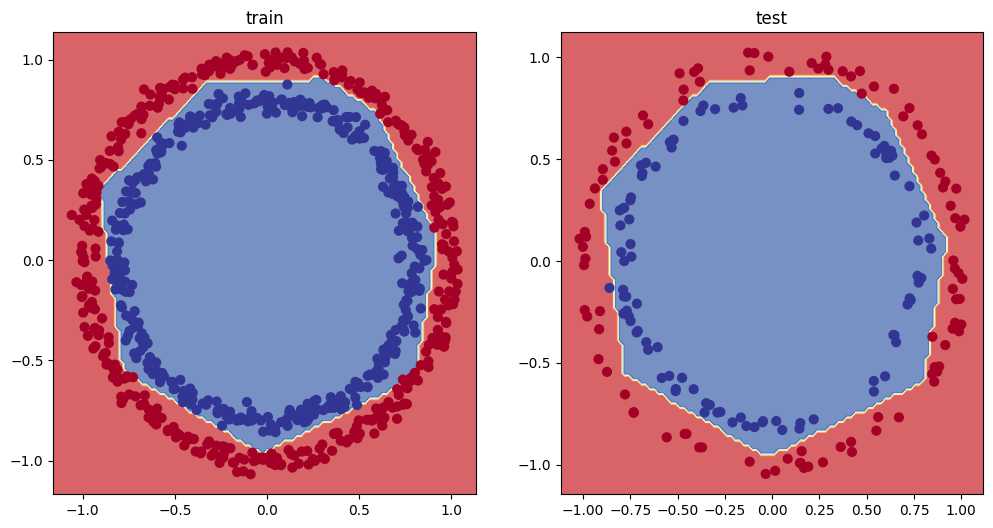

In [94]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_12, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_12, X_test, y_test);

In [ ]:
#basically perfect on both datasets...

#lets look at some more evaluation metrics to evaluate classification models

#higher precision leads to less false positives, someone tests positive for corona and doesnt have corona

#recall, higher recall leads to less false negatives, someone has corona when the test comes back and says they didnt

#there is a trade off between the two cant really increase both, one goes up the other goes down

#try to imrove the f1-score a combo between precision and recall

#most of these metrics are in sklearn.metrics._____() or tf.keras.metrics.___()

In [95]:
#more classification evaluation metrics

#there are a handful of other classification evaluation metrics and methods you shoud be fimiliar with

#Accuracy
#precision / high leads to less false pos
#recall / high leads to less false neg
#f1-score
#confusion matrix
#classification_report (from sklearn)

#almost all  of these metrics take the true values and the models predictions

loss, accuracy = model_12.evaluate(X_test, y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set {(accuracy * 100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9950 - loss: 0.0722 
model loss on the test set: 0.06909048557281494
model accuracy on the test set 99.50%


In [98]:
#how about a confusion matrix, lets see how we can make a confusion matrix with our model

from sklearn.metrics import confusion_matrix

model_12_preds = model_12.predict(X_test)
print(confusion_matrix(y_test, model_12_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [99]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [100]:
model_12_preds[:10] #our predictions are not 0 or 1, need to convert our predictions array into 0s and 1s\
#looks like our prediction array came out in pred probablity form, the standard output from the sigmoid acitvatoin formatmodel

array([[9.5034373e-01],
       [9.5034373e-01],
       [9.5034373e-01],
       [9.5034373e-01],
       [3.4546047e-01],
       [1.4328913e-02],
       [9.0075970e-01],
       [4.9572814e-02],
       [9.5034373e-01],
       [7.6176366e-04]], dtype=float32)

In [102]:
#convert our prediction proabilites to binary format and view the first 10
model_12_preds = tf.round(model_12_preds) #now we have the integer form needed for a confusion matrix

In [103]:
confusion_matrix(y_test, model_12_preds) #one wrong that

array([[101,   0],
       [  1,  98]])

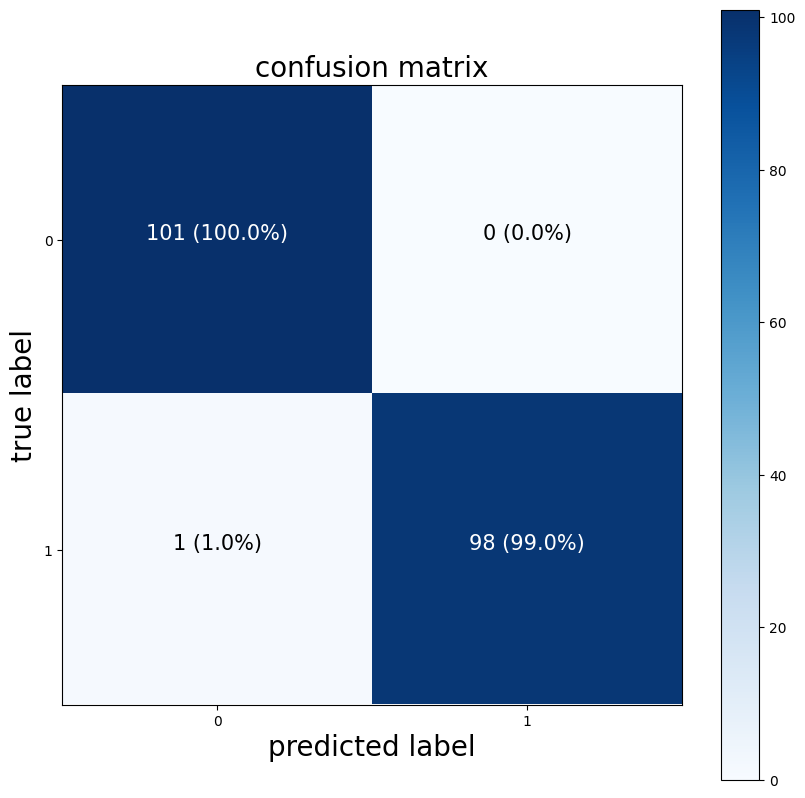

In [113]:
#how about we prettify our confusion matrix

#note the confusion matrix code we are about to write is a remix of sklearns plot confusion matrix funciton
#the sklearn function only works on sklearn models

import itertools
figsize = (10, 10)

#create the confusion matrix
cm = confusion_matrix(y_test, model_12_preds)

#lets get percentages of correct
cm_norm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis]
n_classes = cm.shape[0]

#lets prettify it
figure, ax = plt.subplots(figsize = figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
figure.colorbar(cax)

#create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#label the axes
ax.set(title = "confusion matrix",
       xlabel = "predicted label",
       ylabel = "true label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

#set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#set the label sizes
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i, j] > threshold else "black",
           size = 15)



In [105]:
cm_norm #this is to get percentages appearing next to the total result

array([[1.        , 0.        ],
       [0.01010101, 0.98989899]])